## 1. Web Scraping

Find a webpage with at least two tables and parse the tables, writing each one in a separate csv file.

In [10]:
import urllib2
import pandas as pd
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_genetic_disorders"
html = urllib2.urlopen(url).read()  #first get the webpage you want and save in this variable html
soup = BeautifulSoup(html,"html5lib")
tables = soup.findAll( "table" )

for i in range(len(tables)):
    curTable = tables[i]
    fullTable = []
    rows = curTable.findAll('tr')
    for tr in rows:
        cells = tr.findAll('td')
        if not cells:
            cells = tr.findAll('th')

        line = []
        for cell in cells:
            line.append(cell.get_text().strip().encode('ascii', 'ignore'))

        fullTable.append(line)

    columns = fullTable.pop(0)
    df = pd.DataFrame(fullTable, columns=columns).set_index(columns[0])
    df.to_csv("table_{0}.csv".format(i+1))


## 2. Pandas and Stats

Use the iris dataset from the web scraping class. Download the dataset from wikipedia using beatifulsoup, create a pandas dataframe containing the dataset. Calculate the average and standard deviation for each variable and the average and standard deviation for each variable based on the iris species. Make graphs showing the covariance of the variables.

In [11]:
import urllib2
url = "https://en.wikipedia.org/wiki/Iris_flower_data_set"
html = urllib2.urlopen(url).read()  

from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html5lib")

table = soup.find( "table")
fullTable2 = []
 
rows = table.findAll('tr')
for tr in rows:
    line = []
    if tr.findAll('th'):
        cols = tr.findAll('th')
        for td in cols:
            line.append(td.get_text().strip().encode('ascii','ignore'))
    else:
        cols = tr.findAll('td') #if cant find th's then looking for td's
        for td in cols:
            line.append(td.get_text().strip().encode('ascii','ignore'))
    
    fullTable2.append(line)
 
import pandas as pd
headers = fullTable2.pop(0)
df = pd.DataFrame(fullTable2, columns=headers) #df for dataframes
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I.setosa
1,4.9,3.0,1.4,0.2,I.setosa
2,4.7,3.2,1.3,0.2,I.setosa
3,4.6,3.1,1.5,0.2,I.setosa
4,5.0,3.6,1.4,0.2,I.setosa
5,5.4,3.9,1.7,0.4,I.setosa
6,4.6,3.4,1.4,0.3,I.setosa
7,5.0,3.4,1.5,0.2,I.setosa
8,4.4,2.9,1.4,0.2,I.setosa
9,4.9,3.1,1.5,0.1,I.setosa


In [12]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width,Species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.4,0.2,I.setosa
freq,10,26,13,29,50


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length    150 non-null object
Sepal width     150 non-null object
Petal length    150 non-null object
Petal width     150 non-null object
Species         150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB


In [14]:
df['Sepal length'] = df['Sepal length'].apply(pd.to_numeric)
df['Sepal width'] = df['Sepal width'].apply(pd.to_numeric)
df['Petal length'] = df['Petal length'].apply(pd.to_numeric)
df['Petal width'] = df['Petal width'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length    150 non-null float64
Sepal width     150 non-null float64
Petal length    150 non-null float64
Petal width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.groupby('Species').describe()

Petal length  Petal width  Sepal length  Sepal width
Species                                                                 
I.setosa     count     50.000000    50.000000     50.000000    50.000000
             mean       1.462000     0.246000      5.006000     3.428000
             std        0.173664     0.105386      0.352490     0.379064
             min        1.000000     0.100000      4.300000     2.300000
             25%        1.400000     0.200000      4.800000     3.200000
             50%        1.500000     0.200000      5.000000     3.400000
             75%        1.575000     0.300000      5.200000     3.675000
             max        1.900000     0.600000      5.800000     4.400000
I.versicolor count     50.000000    50.000000     50.000000    50.000000
             mean       4.260000     1.326000      5.936000     2.770000
             std        0.469911     0.197753      0.516171     0.313798
             min        3.000000     1.000000      4.900000     2.000000
             25%        4.000000     1.200000      5.600000     2.525000
             50%        4.350000     1.300000      5.900000     2.800000
             75%        4.600000     1.500000      6.300000     3.000000
             max        5.100000     1.800000      7.000000     3.400000
I.virginica  count     50.000000    50.000000     50.000000    50.000000
             mean       5.552000     2.026000      6.588000     2.974000
             std        0.551895     0.274650      0.635880     0.322497
             min        4.500000     1.400000      4.900000     2.200000
             25%        5.100000     1.800000      6.225000     2.800000
             50%        5.550000     2.000000      6.500000     3.000000
             75%        5.875000     2.300000      6.900000     3.175000
             max        6.900000     2.500000      7.900000     3.800000

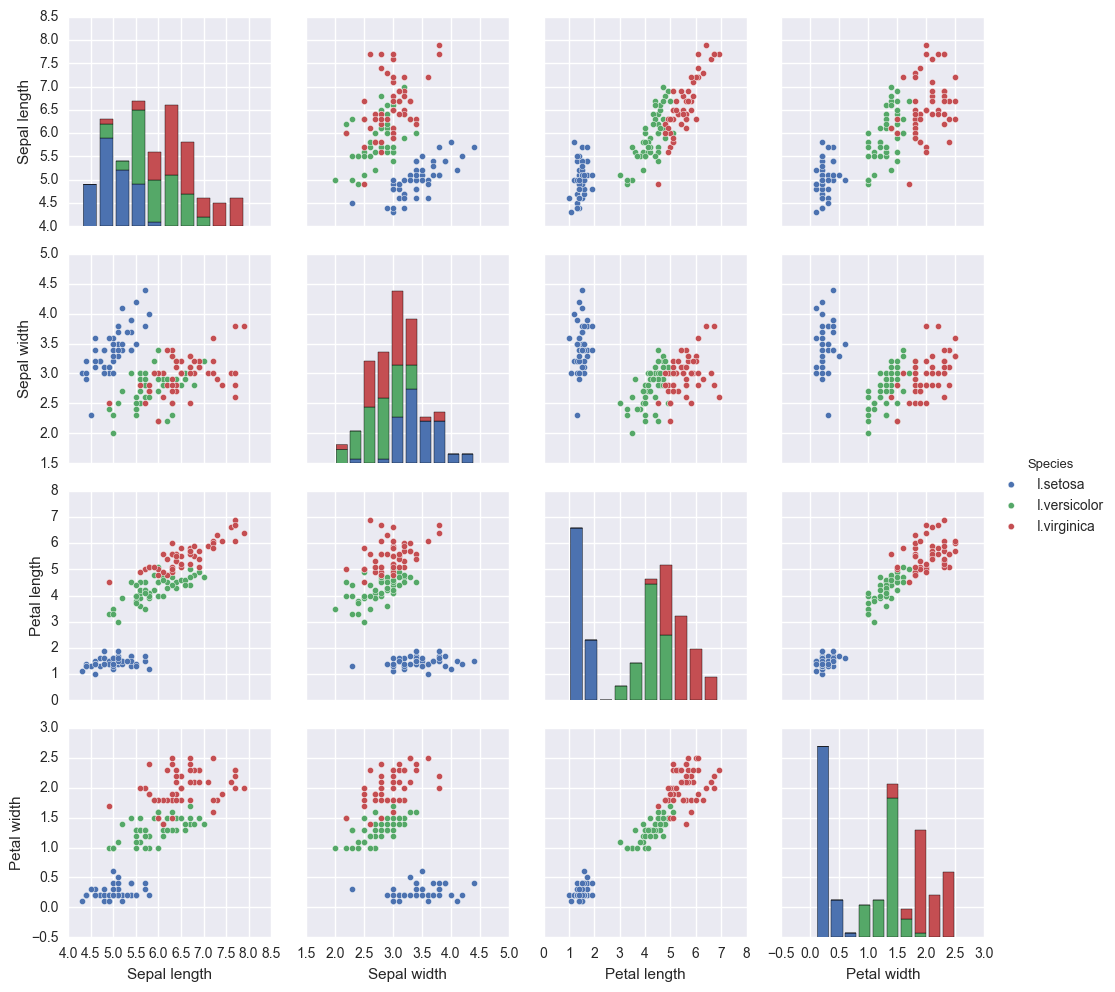

In [17]:

%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue="Species")

## 3. Partial Correlations

Modify the code of the `partial_cor()` function from Class_16 so that it takes as input a correlation matrix and the name of one variable, and returns the partial correlation for each pair of variables controlled for the variable you passed to the function.

For example, if you use the correlation matrices that we calculated in Class_16, you could use the function by calling: `partial_cor(cor1, CAI)`, this would return the partial correlation of each pair of variables (minus CAI) controlled by CAI.

To do this, please save the `result` dataframe from Class_16 to a file, copy the file to the homework directory, read the file into a datframe, calculate the correlation matrix, and finally test your function.

In [50]:
#partial correlation.. just making eqn with with variables?
#ABCDE matrix.
#Function(Cor, Var)
#Say you want to control D, find correlation between A&B controlled by D, A&C controlled by D, A&E......
#look through list twice (for i in list and for j in list) Change all i and j's to..?
#there is a controlling variable, remove it from the list, call the ??

#note the multiple lines in python. I enclosed the whole expression 
#in parenthesis so that python knows that it continues in the next
#line.
import pandas as pd

df = pd.read_csv("spearman.txt", index_col=0)

def partial_cor(cor,x,y,z):
    from math import sqrt
    rdk = ((cor[x][y]-cor[x][z]*cor[y][z])/ 
       (sqrt(1-cor[x][z]**2)*sqrt(1-cor[y][z]**2)))
    return rdk

df

,CAI,dS,dN,dN/dS,dS adjusted,dN/dS adjusted,fitness,fdS,fdN,fdNdS,fdSadj,fdNdSadj
CAI,1.000000,-0.334174,-0.517291,-0.475607,0.085854,-0.552973,-0.138569,-0.334174,-0.517291,-0.475607,0.085854,-0.552973
dS,-0.334174,1.000000,0.501368,0.294553,0.866112,0.382630,0.122576,1.000000,0.501368,0.294553,0.866112,0.382630
dN,-0.517291,0.501368,1.000000,0.961700,0.281347,0.986180,0.228192,0.501368,1.000000,0.961700,0.281347,0.986180
dN/dS,-0.475607,0.294553,0.961700,1.000000,0.089970,0.983193,0.220612,0.294553,0.961700,1.000000,0.089970,0.983193
dS adjusted,0.085854,0.866112,0.281347,0.089970,1.000000,0.139763,0.073182,0.866112,0.281347,0.089970,1.000000,0.139763
dN/dS adjusted,-0.552973,0.382630,0.986180,0.983193,0.139763,1.000000,0.230170,0.382630,0.986180,0.983193,0.139763,1.000000
fitness,-0.138569,0.122576,0.228192,0.220612,0.073182,0.230170,1.000000,0.122576,0.228192,0.220612,0.073182,0.230170
fdS,-0.334174,1.000000,0.501368,0.294553,0.866112,0.382630,0.122576,1.000000,0.501368,0.294553,0.866112,0.382630
fdN,-0.517291,0.501368,1.000000,0.961700,0.281347,0.986180,0.228192,0.501368,1.000000,0.961700,0.281347,0.986180
fdNdS,-0.475607,0.294553,0.961700,1.000000,0.089970,0.983193,0.220612,0.294553,0.961700,1.000000,0.089970,0.983193


In [51]:
partial_cor(df,'CAI','dS','fitness')

#v = raw_input("controlling variable: ")
def control(df, v):
    import pandas as pd
    names = list(df.columns.values)
    if v in names:
        names.remove(v)
    else:
        return "Wrong variable name: {var}. Available names are {names}".format(var = v, names = names)
    
    myCor = {}
    for name in names:
        myCor[name] = {}
        
    
    for cols in names:
        for rows in names:
            myCor[cols][rows] = partial_cor(df, rows, cols, v) #for dataframe, row, column, controlling

    return pd.DataFrame(myCor)

control(df,'fitness')

,CAI,dN,dN/dS,dN/dS adjusted,dS,dS adjusted,fdN,fdNdS,fdNdSadj,fdS,fdSadj
CAI,1.000000,-0.503691,-0.460724,-0.540671,-0.322712,0.097190,-0.503691,-0.460724,-0.540671,-0.322712,0.097190
dN,-0.503691,1.000000,0.959700,0.985416,0.489920,0.272549,1.000000,0.959700,0.985416,0.489920,0.272549
dN/dS,-0.460724,0.959700,1.000000,0.982344,0.276353,0.075894,0.959700,1.000000,0.982344,0.276353,0.075894
dN/dS adjusted,-0.540671,0.985416,0.982344,1.000000,0.366963,0.126650,0.985416,0.982344,1.000000,0.366963,0.126650
dS,-0.322712,0.489920,0.276353,0.366963,1.000000,0.865976,0.489920,0.276353,0.366963,1.000000,0.865976
dS adjusted,0.097190,0.272549,0.075894,0.126650,0.865976,1.000000,0.272549,0.075894,0.126650,0.865976,1.000000
fdN,-0.503691,1.000000,0.959700,0.985416,0.489920,0.272549,1.000000,0.959700,0.985416,0.489920,0.272549
fdNdS,-0.460724,0.959700,1.000000,0.982344,0.276353,0.075894,0.959700,1.000000,0.982344,0.276353,0.075894
fdNdSadj,-0.540671,0.985416,0.982344,1.000000,0.366963,0.126650,0.985416,0.982344,1.000000,0.366963,0.126650
fdS,-0.322712,0.489920,0.276353,0.366963,1.000000,0.865976,0.489920,0.276353,0.366963,1.000000,0.865976


## 4. Comparison to Wall et al.

Replicate the results from Table 1 from Wall et al (2005) for the SGTC data. Then create a table comparing the results you obtained with those from Wall et al's Table 1. How good is the correspondence between yours and theirs results?

You will need to scrape Table 1 from the PNAS website (http://www.pnas.org/content/102/15/5483/T1.expansion.html) using BeautifulSoup and paste the value of the BeautifulSoup variable containing the table in a markdown cell.

In [49]:
import urllib2
url = "http://www.pnas.org/content/102/15/5483/T1.expansion.html"
html = urllib2.urlopen(url).read()  

from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html5lib")

table = soup.find( "table")
Table = []
 
rows = table.findAll('tr')
for tr in rows:
    line = []
    if tr.findAll('th'):
        cols = tr.findAll('th')
        for td in cols:
            line.append(td.get_text().strip().encode('ascii','ignore'))
    else:
        cols = tr.findAll('td') #if cant find th's then looking for td's
        for td in cols:
            line.append(td.get_text().strip().encode('ascii','ignore'))
    
    Table.append(line)
 
import pandas as pd
headers = Table.pop(0)
evodf = pd.DataFrame(Table, columns=headers) #df for dataframes
evodf

# The correspondence between my results and their results are actually fairly close although not identical. For 
# instance, when looking at dN/dS controlled for CAI in rxk, my value was -.528 and their value was -.541. Unfortunately,
# there are some values of mine that are further off than I would like, but overall, my values correspond relatively
# well with the given values.

,Evolution rate,Dispensability,rdk,Expression,rxk,rdk|x,xk|d
0,dN/dS,Warringer et al.,0.239 np,mRNA abundance,-0.368 np,0.183 np,-0.328 np
1,,,,CAI,-0.528 np,0.190 np,-0.513 np
2,dN,Warringer et al.,0.237 np,mRNA abundance,-0.363 np,0.181 np,-0.324 np
3,,,,CAI,-0.493 np,0.189 np,-0.478 np
4,dN/dS,SGTC,0.230 np,mRNA abundance,-0.368 np,0.166 np,-0.330 np
5,,,,CAI,-0.528 np,0.187 np,-0.516 np
6,dN,SGTC,0.227 np,mRNA abundance,-0.363 np,0.163 np,-0.325 np
7,,,,CAI,-0.493 np,0.185 np,-0.479 np
8,dN/dS,Warringer et al.,0.274,mRNA abundance,-0.279,0.259,-0.256
9,,,,CAI,-0.522,0.241,-0.505
